## Probability Distribution Review


Hello there!

Probability and its application is something that totally permeates our lives.  Any time we make a choice, especially impulsive ones, we are using probability from data gathered by our own life experiance. Any time we make an educated guess about the future, we are incorporating probability. And especially when you get down to the subatomic scale, our entire universe is governed by the laws of probability.

We can use Python to create visualizions to aid us in this review.  Let's start by setting up our coding environment.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline
#we add matplotlib inline to make visualizations lok better in Jupyter.

There are 5 main types of probability distribution. Each can be used to model particular situations. To model each distribution, we will create a random sample of a variable of each distribution.


## Bernouli Distribution


The Bernouli distrubution simulates the probability of an event with 2 outcomes: success or failure, heads or tails. 

The probability mass function for the Bernouli distribution is: 
\begin{equation}
  f(k|p)=\left\{
  \begin{array}{@{}ll@{}}
    p, & \text{if}\ k=1 \\
    1-p, & \text{if}\ k=0
  \end{array}\right.
\end{equation} 
with a probability of success __p__,  an outcome of __k__ (where 1 is success)

Let's use the Bernouli distribution to model a coin toss, where the outcome is either heads or tails.  Assuming an unbiased coin, there wil be a 0.5 chance of either outcome happening. 

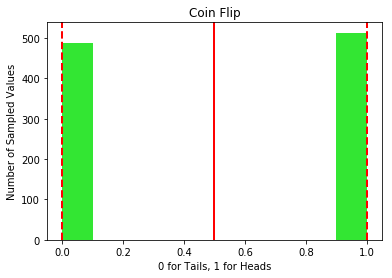

In [50]:
bernouli = np.random.binomial(1, 0.5, 1000)
#we create a random sample of a coin flip
#1 trial, 0.5 probability, 1000 sampled values

plt.hist(bernouli, color=(.2,.9,.2))
#create a histogram of the sample

plt.title('Coin Flip')
plt.axvline(0.5, color='red', linestyle='solid', linewidth=2)
#set a solid red line at the mean of the distribution
plt.axvline(np.percentile(bernouli, 75), color='red', linestyle='dashed', linewidth=2)
#create a dashed line at the upper quartile, top 75%
plt.axvline(np.percentile(bernouli, 25), color='red', linestyle='dashed', linewidth=2)
#create a dashed line at the lower quartile, bottom 25%

plt.xlabel('0 for Tails, 1 for Heads')
plt.ylabel('Number of Sampled Values')

plt.show()

Because a bernouli variable only happens once, the mean of a Bernouli distribution is simply the likelyhood that the successful outcome will occur, in this case, 0.5.  The only values in a Bernouli distribution are 0 or 1, 0 for a failure and 1 for a success, where success and failure are specifically defined.  In our example, tails could be a success and heads could be a failure.



## Binomial Distribution


The binomial distribution is similar to the bernouli distribution. A binomial variable also models a scenario where there are only 2 outcomes but instead of one trial it models many.

The probability mass function for the Binomial distribution is:

\begin{equation}
f(k| n,p)= \left(
  \begin{array}{@{}ll@{}}
    n \\
    k
  \end{array}\right) p^k (1-p)^{(n-k)}
\end{equation}

with a probability of success __p__, a number of repitions __n__, an outcome of __k__  

While a bernouli variable is a good model for a coin flip, a binomial variable could be used to model 100 coin flips. Let's use it to do just that.

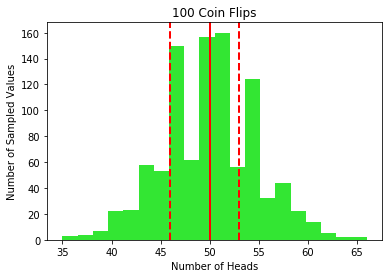

In [51]:
binomial = np.random.binomial(100, 0.5, 1000)
#we create a random sample of 100 coin flips
#100 trials, 0.5 probability, 1000 sampled values

plt.hist(binomial, color=(.2,.9,.2), bins=20)

plt.title('100 Coin Flips')

plt.axvline(binomial.mean(), color='red', linestyle='solid', linewidth=2)
#create a solid line at the mean
plt.axvline(np.percentile(binomial, 75), color='red', linestyle='dashed', linewidth=2)
#create a dashed line at the upper quartile, top 75%
plt.axvline(np.percentile(binomial, 25), color='red', linestyle='dashed', linewidth=2)
#create a dashed line at the lower quartile, bottom 25%

plt.xlabel('Number of Heads')
plt.ylabel('Number of Sampled Values')

plt.show()

Because a binomial variable is repeated so many times, the mean is the number of occurences times the probability. This model was representing 100 unbiased coin flips, so we would expect 50 to be heads and 50 to be tails. Therefore, the mean should be 50.  

This is a good time to note that because these are random samples, there actually means, upper quartile, lower quartile, and overall curve may slightly vary from its theoretical value.


## Gamma Distribution


Gamma distribution is entirely different from the past two. Instead of modeling the outcome of an event, the gamma distribution models the probability of when an event will occur. The gamma distribution is a bit more complicated than binomial, as it is not so obviously related to a simple like success or failure. Rather, it is summarized by a shape parameter ($\alpha$) and an inverse-scale parameter ($\beta$).

The probability density function is:

\begin{equation}
f(x|\alpha,\beta)=\frac{\beta^\alpha x^{\alpha-1} e^{-x\beta}} {\Gamma(\alpha)} \text {for } x \ge 0 \text { and } \alpha,\beta \ge0
\end{equation} 

with a shape parameter __($\alpha$)__, an inverse-scale parameter __($\beta$)__, a time of occurance of __x__

Let's say we want to model the average time it takes for someone you call you back after missing your call to their cell phone. When someone misses your call, they likely aren't too close to their phone or at least not in a position to be paying attention to it. Therefore, most people will probably call back after a few minutes of noticing that they had a missed call.  In theory anyway.But seeing as how we don't have access to Facebook's records, lets just estimate our call likelyhood.

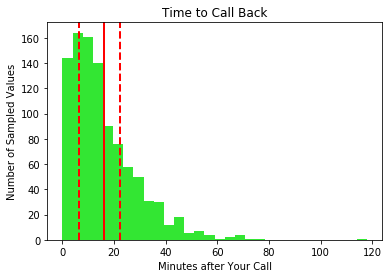

In [52]:
gamma = np.random.gamma(1.4, 12, 1000)
#we create a random sample of the time it takes to call back
#1.4 shape parameter, 12 size parameter, 1000 sampled values

plt.hist(gamma, color=(.2,.9,.2), bins=30)

plt.title('Time to Call Back')
plt.axvline(gamma.mean(), color='red', linestyle='solid', linewidth=2)
#create a solid line at the mean
plt.axvline(np.percentile(gamma, 75), color='red', linestyle='dashed', linewidth=2)
#create a dashed line at the upper quartile, top 75%
plt.axvline(np.percentile(gamma, 25), color='red', linestyle='dashed', linewidth=2)
#create a dashed line at the lower quartile, bottom 25%

plt.xlabel('Minutes after Your Call')
plt.ylabel('Number of Sampled Values')

plt.show()

As the curve suggests, it usually takes people a few minutes to realize they have missed your called, but usually do so in about 15 minutes. Of course, we enginieered it to show that data. 


## Poisson Distribution 


The poisson distribution is different still.  It models the likelyhood that a certain number of events will occur in a given time interval. Summarized by $\lambda$ (“lambda”), the rate that a certain independent event will occur during a given time period.

The probability mass function is:

\begin{equation}
f(k|\lambda)=\frac{\lambda^k e^{-\lambda}}{k!}
\end{equation} 

with a rate of occurance  $\lambda$, and a number of occurances __k__

Lets try and model the number of calls a radio station gets in a minute. Since each call is usually coming from a different person, they all happen seperately and independly of one another, so we can apply the Poisson distribution. This will be a station for small city, usually recieving around 4 calls per minute.  Of course, every so often they are able to have contests which make the calls per minute increase greatly. 

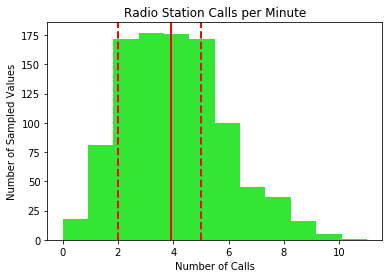

In [53]:
poisson = np.random.poisson(4, 1000)
#create a random sample of the number of calls the radio station gets per minute
#lambda value of 4, 1000 sampled values

plt.hist(poisson, color=(.2,.9,.2), bins=12)

plt.title('Radio Station Calls per Minute')
plt.axvline(poisson.mean(), color='red', linestyle='solid', linewidth=2)
#create a solid line at the mean
plt.axvline(np.percentile(poisson, 75), color='red', linestyle='dashed', linewidth=2)
#create a dashed line at the upper quartile, top 75%
plt.axvline(np.percentile(poisson, 25), color='red', linestyle='dashed', linewidth=2)
#create a dashed line at the lower quartile, bottom 25%

plt.xlabel('Number of Calls')
plt.ylabel('Number of Sampled Values')

plt.show()

As expected, the number of calls hovers around 4, but varies greatly due to the frequent change in peak and low listening hours and the rare constest or giveaway.


## Normal Distribution


The normal distribution is special. Many of the behaviors and properties in both humans and the natural world can be modelled by the normal distribution. Most continious measurements of any large population, such as height or weight, tend to fall into a normally distributed curve, or "bell curve" named for its shape.  Addionally, similalar discrete measurements, such as test scores, tend to fall into a bell curve when the sample size becomes large enough. 

The probability density function is:

\begin{equation}
f(x|\mu,\sigma^2)=\frac1{\sqrt{2\sigma^2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation} 

with a population mean _$\mu$_, a population standard deviation _$\sigma$_, a sample mean __x__

The normal distribution is special beyond how pervasive it is in our world, it also has a special relation to it's 2 parameters, mean, _$\mu$, and standard deviation, _$\sigma$_ Keep that in mind as we create our model.  We can use the normal distribution to model IQ scores, which follow a normal curve in the real world.  The average or mean IQ is 100, and the standard deviation of 15. 

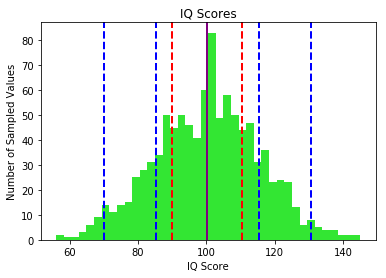

In [54]:
normal = np.random.normal(100, 15, 1000)

plt.hist(normal, color=(.2,.9,.2), bins=40)

plt.title('IQ Scores')
plt.axvline(normal.mean(), color='purple', linestyle='solid', linewidth=2)
#create a solid red line at the mean
plt.axvline(np.percentile(normal, 75), color='red', linestyle='dashed', linewidth=2)
#create a dashed red line at the upper quartile, top 75%
plt.axvline(np.percentile(normal, 25), color='red', linestyle='dashed', linewidth=2)
#create a dashed red line at the lower quartile, bottom 25%
plt.axvline(normal.mean()+normal.std(), color='blue', linestyle='dashed', linewidth=2)
#creates a dashed blue line 1 standard deviation above the mean
plt.axvline(normal.mean()+2*normal.std(), color='blue', linestyle='dashed', linewidth=2)
#creates a dashed blue line 2 standard deviation above the mean
plt.axvline(normal.mean()-normal.std(), color='blue', linestyle='dashed', linewidth=2)
#creates a dashed blue line 1 standard deviation below the mean
plt.axvline(normal.mean()-2*normal.std(), color='blue', linestyle='dashed', linewidth=2)
#creates a dashed blue line 2 standard deviation below the mean

plt.xlabel('IQ Score')
plt.ylabel('Number of Sampled Values')

plt.show()

We have changed the colors around in this graph, because of the normal distribution special interaction. Solid purple is the mean, dashed blue are the standard deviations, and dashed red are still the top and bottom quarter. We have only put on 2 standard deviations above and below the mean. Of course all distributions have a standard deviation, but the normal distribution has a special interaction with it: 

68% of all values reside within 1 standard deviation of the mean.
95% of all values reside within 2 standard deviations of the mean.
99.7% of all value reside within 3 standard deviations of the mean.

So the values in between the middle blue lines represent 68% of the data. The values in between the outer blue lines represent 95% of all the values. This is representative of actual IQ data since 68% of people have an IQ between 85 and 115, in fact, the IQ is qdjusted to make that so. 